In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import numpy as np
import os, sys
import imageio

path_txt = os.path.join('dataset', 'train', 'gt')
path_mask = os.path.join('dataset', 'train', 'mask')

dirs_txt = os.listdir(path_txt)
dirs_mask = os.listdir(path_mask)

data = dict()
#
for gt in dirs_txt:
    with open(os.path.join(path_txt, gt)) as f:
        lines = f.readlines()
        
        im_name = gt.replace('gt', 'mask').replace('txt', 'png')
        im_open = (imageio.imread(os.path.join(path_mask, im_name)))

        lista = list()
        for l in lines:
            tly, tlx, bry, brx, tipo = l.split(' ')  
            tly, tlx, bry, brx = map(float, [tly, tlx, bry, brx])
            d = dict()
            d['type'] = tipo.strip()
            
            w = brx - tlx
            h = bry - tly
            
            d['width'] = w
            d['height'] = h
            d['bbox_area'] = w*h
            d['form_factor'] = w/h
            
            d['tly'] = round(tly)
            d['tlx'] = round(tlx)
            d['bry'] = round(bry)
            d['brx'] = round(brx)
            
            sub_mask = im_open[d['tly']:d['bry'], d['tlx']:d['brx']]
            mask_area = np.count_nonzero(sub_mask)
            d['mask_area'] = mask_area
            d['filling_ratio'] = mask_area / d['bbox_area']
            
            lista.append(d)
            
        data[gt] = lista
    

In [ ]:
# Group data by "type" (letter) and get statistics:

# Function = get_stats (only shape, aspect ratio, etc, NOT COLOUR)

# Queremos estadisticas de tamaño y forma en función de cada letra

for k, v in data.iteritems():
    for value in v:
        
        

In [ ]:
# Plot and compare results

# Item 2 - Split training dataset

Al separar por tipo, tenemos que armar un algoritmo que nos separe el set de training en dos carpetas, 
separando mismos tipos en 70% / 30%.

# Item 3 - Separation by colour


Para cada imagen de prueba, nos basamos en el diccionario y usamos el bounding box que ya calculamos.

Recortamos la imagen, le calculamos el histograma. Sumamos los histogramas de todas las imágenes y obtenemos la suma total.

Luego hacemos lo mismo y al recortar la roi de cada imagen convertimos la roi de rgb a hsv, calculamos el histograma
y obtenemos la suma de todos los histogramas. 

Con estas cosas deberíamos poder obtener los thresholds a aplicar luego.


Hacer gráficos chetos de los histogramas. Ajustar con multiples gaussianas, calcular promedio, mediana, std, etc.
Compararlos y elegir el mejor.

Luego aplicar las máscaras con los thresholds calculados

In [ ]:
# Convert RGB images tu HUE images

# Get stats from HUE images

# Plot and compare

# Select thresholds (RGB y HUE)

# Create masks using previous thresholds

# Item 4 - Evaluate colour masks 

Comparar las máscaras obtenidas con el ground truth.

Podemos ver si sirven las funciones que ya nos dieron hechas.

In [5]:
print(data['gt.00.005025.txt'][0])
print(data['gt.00.005025.txt'][1])

for gt in dirs_txt:
    print(data[gt][0]['filling_ratio'])

{'type': 'C', 'width': 52.799999999999955, 'height': 56.21000000000001, 'bbox_area': 2967.8879999999976, 'form_factor': 0.939334637964774, 'tly': 71, 'tlx': 1332, 'bry': 128, 'brx': 1385, 'mask_area': 2327, 'filling_ratio': 0.7840592367366969}
{'type': 'C', 'width': 51.299999999999955, 'height': 54.43000000000001, 'bbox_area': 2792.2589999999977, 'form_factor': 0.9424949476391686, 'tly': 146, 'tlx': 1324, 'bry': 201, 'brx': 1375, 'mask_area': 2179, 'filling_ratio': 0.7803717348569749}
0.9796430016227946
0.7829917109304699
0.779882074974158
0.9943929083153082
0.5016050383439404
0.8398843530936049
0.8109645434845706
0.781961127989267
0.504464747651482
0.7856511897700452
0.7828610071923262
0.4954997528834202
0.4983536791216116
0.5031838896435575
0.784381028486092
0.783118743207542
0.4993018027683605
0.5043875048553433
0.49412421853180677
0.48998449667030797
0.4941161438585812
0.9858810096240821
0.7822264988464417
0.782690713405613
0.7802153727401375
0.503899753262297
0.9949423762540434
0.

In [44]:
for mask in dirs_mask:
    gt = mask.replace('mask', 'gt').replace('png', 'txt')
    m = (imageio.imread(os.path.join(path_mask, mask)))
    mask_area = m.sum()
    d = data[gt]
    d['mask_area'] = mask_area
    d['filling_ratio'] = mask_area / d['bbox_area']
    
    print(d['mask_area'], d['filling_ratio'], mask)
    

TypeError: list indices must be integers or slices, not str

In [33]:
print(dirs_mask[0].replace('mask', 'gt').replace('png', 'txt'))
print(dirs_txt[0])


gt.00.000948.txt
gt.00.005413.txt


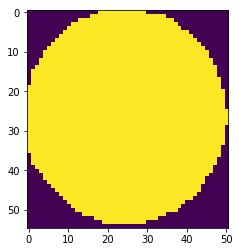

In [58]:
import matplotlib.pyplot as plt

% matplotlib inline

m = imageio.imread(os.path.join(path_mask,'mask.00.005025.png')).astype(np.int8)

plt.imshow(m[146:201, 1324:1375])
